In [5]:
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn import manifold
import matplotlib.pyplot as plt

from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from collections import Counter

In [6]:

def purity_score(y_true, y_pred):
    # 正确预测的样本数 / 总样本数
    return np.mean(y_true == y_pred)


def visualize(X, y, cluster_ids):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # 左图：按真实标签上色
    axes[0].scatter(X[:, 0], X[:, 1], c=y, s=2, cmap="tab10")
    axes[0].set_title("True labels (0–9)")

    # 右图：按聚类簇号上色
    axes[1].scatter(X[:, 0], X[:, 1], c=cluster_ids, s=2, cmap="tab10")
    axes[1].set_title("KMeans clusters")

    plt.show()

def evaluate_clustering(y_true, cluster_ids, n_clusters):
    """
    Evaluate clustering performance using purity, NMI and ARI metrics.

    Parameters:
    -----------
    y_true : array-like
        True labels
    cluster_ids : array-like
        Cluster assignments from clustering algorithm
    n_clusters : int
        Number of clusters

    Returns:
    --------
    tuple
        (purity, nmi, ari, y_pred) where y_pred is the predicted labels after mapping
    """
    # Map each cluster to the most common true label
    label_map = {}
    for k in range(n_clusters):
        members = y_true[cluster_ids == k]
        if len(members) == 0:
            label_map[k] = -1
        else:
            label_map[k] = Counter(members).most_common(1)[0][0]

    # Get predicted labels after mapping
    y_pred = np.array([label_map[k] for k in cluster_ids])

    # Calculate metrics
    purity = purity_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, cluster_ids)
    ari = adjusted_rand_score(y_true, cluster_ids)

    print("Purity: %.4f" % purity)
    print("NMI:    %.4f" % nmi)
    print("ARI:    %.4f" % ari)

    return purity, nmi, ari, y_pred


In [ ]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist["data"]  # (70000, 784) float64
y = mnist["target"].astype(int)  # (70000,) int

n_clusters = 10
km = KMeans(n_clusters=n_clusters, random_state=42)
pca = PCA(n_components=2, random_state=42)
aggc = AgglomerativeClustering(n_clusters=n_clusters)
spec = SpectralClustering(n_clusters=n_clusters, random_state=42)
tsne = manifold.TSNE(n_components=2, random_state=42)

In [ ]:
cluster_ids = km.fit_predict(X)  # (N,) 每个样本的簇标号 0–9
# Evaluate KMeans clustering
purity, nmi, ari, y_pred = evaluate_clustering(y, cluster_ids, n_clusters)

In [12]:
X2 = pca.fit_transform(X)  # (N, 2)
X3 = tsne.fit_transform(X)  # (N, 2)

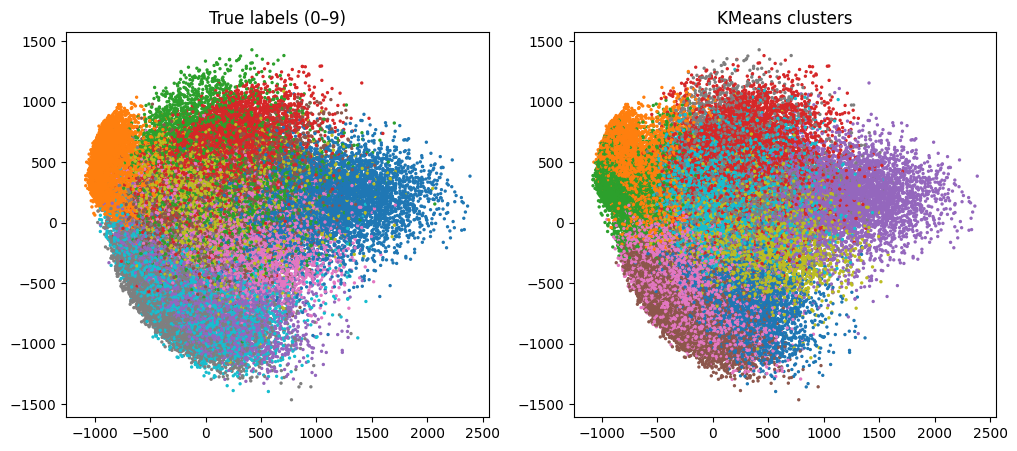

In [13]:
visualize(X2, y, cluster_ids)

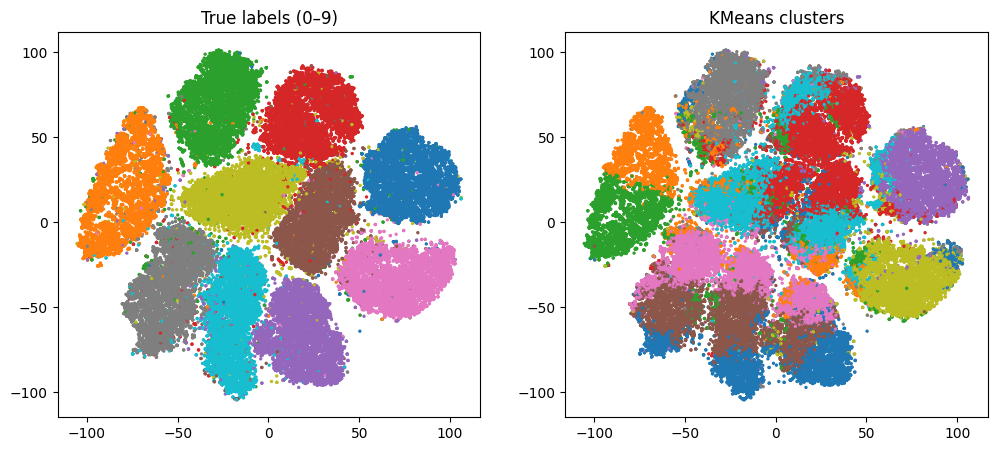

In [14]:
visualize(X3, y, cluster_ids)